In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from itertools import combinations
import itertools


In [2]:
csfbiomk1_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\CSF_Biomarker1\csfbiomk1_20231117.csv"
csfbiomk1 = pd.read_csv(csfbiomk1_file_path)
csfbiomk1 = pd.DataFrame(csfbiomk1)

# right_volume_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Volumetric_Analysis\rh_aparc_volume_20231117.csv"
# right_volume = pd.read_csv(right_volume_file_path)
# right_volume = pd.DataFrame(right_volume)


In [3]:
csfbiomk1.head()


,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,1001,1,2,1,1,5,16.0,7.0,4335.4,2167.7,...,24.4,0.0,0.0,0.0,598.0,373.96,8706.69,487.34,0.6059,1.0
1,1002,1,2,1,1,5,15.0,14.0,10363.1,5708.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003,1,2,1,1,5,18.0,12.0,6685.4,4863.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,1,1,1,2,5,16.0,16.0,7701.2,6448.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,1,3,0,2,5,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Column Names:")
print(csfbiomk1.columns[2])

Column Names:
checkin_bin


In [5]:
#group them base on the value in the third column which indicates their level of playing
csfbiomk1_grouped = csfbiomk1.groupby(csfbiomk1.iloc[:, 2])

NFL_csfbiomk1_grouped = pd.DataFrame()
CP_csfbiomk1_grouped = pd.DataFrame()
HC_csfbiomk1_grouped = pd.DataFrame()


# group_name : 1, 2, 3   group_data: 
for group_name, group_data in csfbiomk1_grouped:
    if group_name == 1:
        NFL_csfbiomk1_grouped = pd.concat([NFL_csfbiomk1_grouped,group_data], ignore_index = True)
    if group_name == 2:
        CP_csfbiomk1_grouped = pd.concat([CP_csfbiomk1_grouped,group_data], ignore_index = True)
    if group_name == 3:
        HC_csfbiomk1_grouped = pd.concat([HC_csfbiomk1_grouped,group_data], ignore_index = True)
    
#print("DataFrame for NFL:")
#print(NFL_right_grouped.head())
NFL_csfbiomk1_grouped.head()



,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,1004,1,1,1,2,5,16.0,16.0,7701.2,6448.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1008,1,1,1,2,3,15.0,22.0,8220.9,5421.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9774,1.0
2,1011,1,1,1,2,5,16.0,20.0,9307.0,9307.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1015,1,1,1,1,3,19.0,17.0,9866.7,6173.3,...,24.0,0.0,0.0,0.0,174.0,472.76,NaN,NaN,NaN,3.0
4,1018,1,1,1,1,3,16.0,23.0,10635.9,7929.6,...,20.5,0.0,0.0,0.0,202.0,336.18,7297.61,316.56,2.0394,1.0


In [6]:
index_of_chiiyrs_pg = NFL_csfbiomk1_grouped.columns.get_loc("chiiyrs_pg")
NFL_csfbiomk1_grouped.drop(columns=NFL_csfbiomk1_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)
CP_csfbiomk1_grouped.drop(columns=CP_csfbiomk1_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)
HC_csfbiomk1_grouped.drop(columns=HC_csfbiomk1_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)

NFL_csfbiomk1_grouped.head()


,subject_id,checkin_bin,c_strem2_FLAG_insufficient,c_PDGFRbeta_FLAG_insufficient,c_strem2,c_PDGFRbeta,c_Ab40,c_Ab42,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,1004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1008,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9774,1.0
2,1011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1015,1,0.0,0.0,1446.0,333.0,6889.0,670.0,24.0,0.0,0.0,0.0,174.0,472.76,NaN,NaN,NaN,3.0
4,1018,1,0.0,0.0,1563.0,209.0,5360.0,463.0,20.5,0.0,0.0,0.0,202.0,336.18,7297.61,316.56,2.0394,1.0


In [7]:
#combine all three classes
combined_csfbiomk1 = pd.concat([NFL_csfbiomk1_grouped, CP_csfbiomk1_grouped, HC_csfbiomk1_grouped], ignore_index=True)

combined_csfbiomk1.head()

,subject_id,checkin_bin,c_strem2_FLAG_insufficient,c_PDGFRbeta_FLAG_insufficient,c_strem2,c_PDGFRbeta,c_Ab40,c_Ab42,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
0,1004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1008,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9774,1.0
2,1011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1015,1,0.0,0.0,1446.0,333.0,6889.0,670.0,24.0,0.0,0.0,0.0,174.0,472.76,NaN,NaN,NaN,3.0
4,1018,1,0.0,0.0,1563.0,209.0,5360.0,463.0,20.5,0.0,0.0,0.0,202.0,336.18,7297.61,316.56,2.0394,1.0


In [8]:
# Remove NaNs
print("Size before:", combined_csfbiomk1.shape)
combined_csfbiomk1.dropna(inplace=True)
print("Size after:", combined_csfbiomk1.shape)

Size before: (236, 18)
Size after: (148, 18)


In [9]:
# Separate based on the level of professionalism
X = combined_csfbiomk1.drop(columns=['subject_id','checkin_bin']) 
y = combined_csfbiomk1['checkin_bin']

In [10]:
X.head()

,c_strem2_FLAG_insufficient,c_PDGFRbeta_FLAG_insufficient,c_strem2,c_PDGFRbeta,c_Ab40,c_Ab42,c_pT181,c_tTau_FLAG_below_ref_range,c_FLAG_hemolysis,c_tTau_FLAG_insufficient,c_ttau,c_NfL,c_GFAP,c_pT231,c_pT217,dxcte_ptau217_csf_flag_dv
4,0.0,0.0,1563.0,209.0,5360.0,463.0,20.5,0.0,0.0,0.0,202.0,336.18,7297.61,316.56,2.0394,1.0
5,0.0,0.0,3328.0,967.0,21115.0,1500.0,104.2,0.0,0.0,0.0,828.0,600.31,12695.85,1218.89,5.2955,1.0
6,0.0,0.0,1595.0,358.0,9435.0,898.0,29.4,0.0,0.0,0.0,222.0,452.69,1504.20,492.71,1.3735,1.0
8,0.0,0.0,2646.0,569.0,15812.0,1332.0,74.0,0.0,0.0,0.0,630.0,747.93,12874.13,1169.94,6.9061,1.0
11,0.0,0.0,4210.0,385.0,11253.0,805.0,54.3,0.0,0.0,0.0,464.0,787.93,11141.23,820.31,3.1215,1.0


In [11]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train =pd.DataFrame(X_train_scaled,columns= X.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X.columns)

In [22]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# store evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")



Accuracy: 0.5111111111111111, Precision: 0.5270655270655271, Recall: 0.5111111111111111, f1:0.5137690631808278


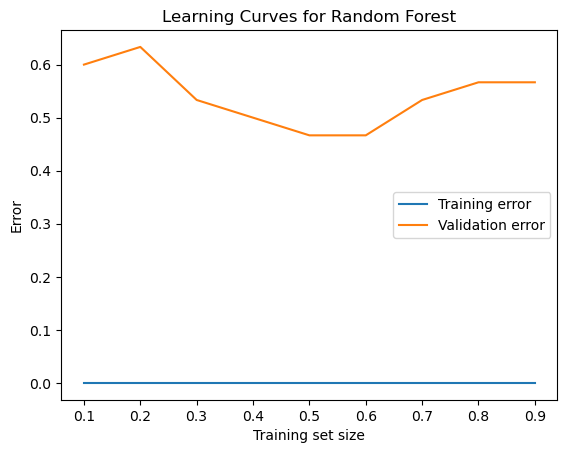

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target vector
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Generate train sizes as fractions, excluding 1.0 to avoid the error
train_sizes = np.linspace(0.1, 0.9, 9)
train_errors = []
val_errors = []

for train_size in train_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size)
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_subset, y_train_subset)
    
    train_predictions = model.predict(X_train_subset)
    val_predictions = model.predict(X_val)
    
    train_errors.append(1 - accuracy_score(y_train_subset, train_predictions))
    val_errors.append(1 - accuracy_score(y_val, val_predictions))

plt.plot(train_sizes, train_errors, label='Training error')
plt.plot(train_sizes, val_errors, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.title('Learning Curves for Random Forest')
plt.legend()
plt.show()